In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
from FileOpener.CSVReader.CSVReader import CSVReader as csv

%matplotlib inline

# 성과분석

## 기간: 2001-04-01 ~ 2018-12-31
## 유니버스: 코스피 내 적자 종목 중 무배당 종목

In [2]:
directory = 'CSVFile/FinancialData/Korea'

net_income = csv.financial_reader('NET_INCOME_KSE.csv', directory).loc[:'2017-12-31']
divd = csv.financial_reader('DIV_OR_NOT_KSE.csv', directory).loc[:'2017-12-31']

In [3]:
kospi_pr = csv.price_reader('KOSPI_FROM_1998_close.csv','CSVFile/Price/Korea/Stocks' )

In [4]:
## Net Income Change => 년
net_income_A = net_income.resample('A-MAR').sum().loc['2001-03-31':]
net_income_A[net_income_A == 0] = np.nan

In [5]:
net_income_def = net_income_A < 0

In [6]:
net_income_def.head()

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A298050,A298690,A300720,A306200,A900030,A900050,A900140,A950010,A950070,A950100
Code,,,,,,,,,,,,,,,,,,,,,
2001-03-31,True,False,True,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2002-03-31,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2003-03-31,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-03-31,True,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2005-03-31,False,False,False,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### Dividend Index 정재

In [7]:
divd.index = net_income_A.index

In [11]:
divd_none = divd.isnull()

In [12]:
divd_none.head()

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A298050,A298690,A300720,A306200,A900030,A900050,A900140,A950010,A950070,A950100
Code,,,,,,,,,,,,,,,,,,,,,
2001-03-31,True,False,True,True,False,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
2002-03-31,True,False,False,True,False,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
2003-03-31,True,False,False,True,False,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
2004-03-31,True,False,False,True,False,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
2005-03-31,True,False,True,True,True,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True


In [13]:
divd_none_net_def = net_income_def & divd_none
divd_none_net_def.head()

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A298050,A298690,A300720,A306200,A900030,A900050,A900140,A950010,A950070,A950100
Code,,,,,,,,,,,,,,,,,,,,,
2001-03-31,True,False,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2002-03-31,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2003-03-31,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-03-31,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2005-03-31,False,False,False,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


## 동일가중 1년간 리밸런싱

In [14]:
from FileOpener.backtester import FinancialBacktest

In [15]:
KOSPI = FinancialBacktest(kospi_pr)

In [16]:
KOSPI.back_date(divd_none_net_def, 'A-MAR')

(DatetimeIndex(['2001-03-31', '2002-03-31', '2003-03-31', '2004-03-31',
                '2005-03-31', '2006-03-31', '2007-03-31', '2008-03-31',
                '2009-03-31', '2010-03-31', '2011-03-31', '2012-03-31',
                '2013-03-31', '2014-03-31', '2015-03-31', '2016-03-31',
                '2017-03-31', '2018-03-31'],
               dtype='datetime64[ns]', freq='A-MAR'),
 DatetimeIndex(['2001-04-01', '2002-04-01', '2003-04-01', '2004-04-01',
                '2005-04-01', '2006-04-01', '2007-04-01', '2008-04-01',
                '2009-04-01', '2010-04-01', '2011-04-01', '2012-04-01',
                '2013-04-01', '2014-04-01', '2015-04-01', '2016-04-01',
                '2017-04-01'],
               dtype='datetime64[ns]', freq='AS-APR'),
 DatetimeIndex(['2002-03-31', '2003-03-31', '2004-03-31', '2005-03-31',
                '2006-03-31', '2007-03-31', '2008-03-31', '2009-03-31',
                '2010-03-31', '2011-03-31', '2012-03-31', '2013-03-31',
                '2014-0

In [17]:
KOSPI.stock_screen(divd_none_net_def, 'A-MAR')

{Timestamp('2001-03-31 00:00:00', freq='A-MAR'): Index(['A000010', 'A000030', 'A000040', 'A000080', 'A000180', 'A000200',
        'A000280', 'A000300', 'A000310', 'A000370',
        ...
        'A024870', 'A025620', 'A025840', 'A025890', 'A025930', 'A027390',
        'A032640', 'A035720', 'A042670', 'A047050'],
       dtype='object', length=235),
 Timestamp('2002-03-31 00:00:00', freq='A-MAR'): Index(['A000080', 'A000150', 'A000310', 'A000660', 'A000720', 'A000760',
        'A000790', 'A000880', 'A000890', 'A001030',
        ...
        'A024870', 'A024890', 'A025560', 'A025830', 'A025840', 'A031820',
        'A034830', 'A035720', 'A047050', 'A063510'],
       dtype='object', length=192),
 Timestamp('2003-03-31 00:00:00', freq='A-MAR'): Index(['A000010', 'A000040', 'A000150', 'A000300', 'A000370', 'A000420',
        'A000470', 'A000540', 'A000660', 'A000720',
        ...
        'A030210', 'A030610', 'A031820', 'A033250', 'A038400', 'A051630',
        'A063160', 'A063510', 'A068870', '

In [18]:
kospi_rt = KOSPI.backtest(divd_none_net_def, 'A-MAR', 'A-MAR')

In [19]:
from FileOpener.backtester import PfAnalysis

In [20]:
KOSPI_pf = PfAnalysis(kospi_rt)

In [29]:
import matplotlib as mpl

In [36]:
mpl.rcParams['font.sans-serif'] = ['KoPubDotum']
mpl.rcParams['font.size'] = 15

## 성과분석

### 당기순익 적자 / 무배당 주식

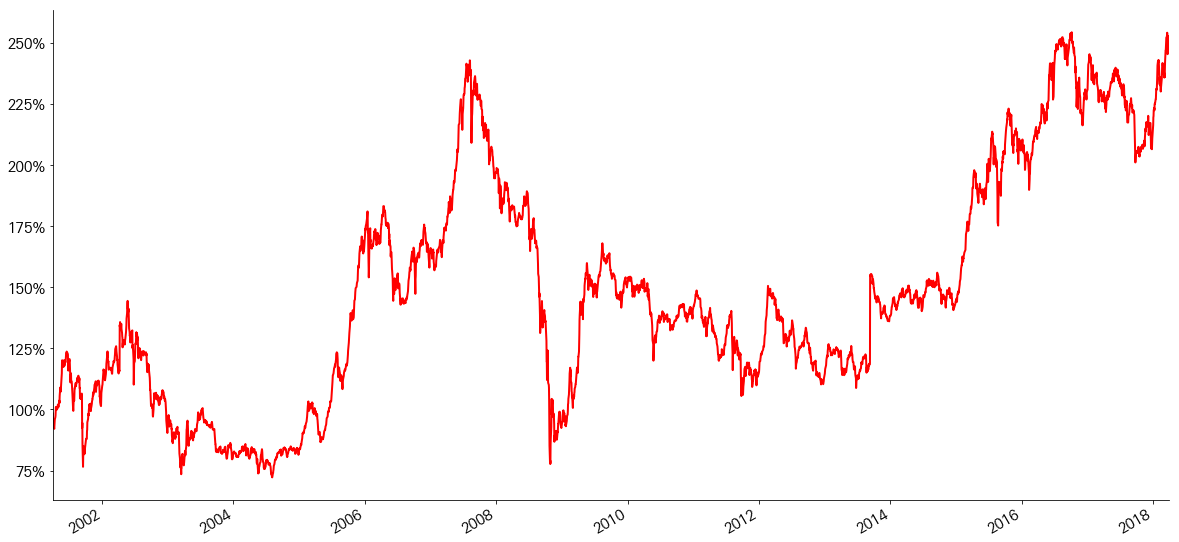

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)


KOSPI_pf.cumReturn().plot(ax=ax, lw = 2, color='red')


ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.margins(x=0, tight=True)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

In [63]:
print(f"CAGR: {round(KOSPI_pf.cagr() * 100, 2)}%")
print(f"Total Return: {round(KOSPI_pf.totalReturn()* 100, 2)}%")
print(f"Maiximum Drawdown: {abs(round(KOSPI_pf.maxDrawDown()* 100, 2))}%")

CAGR: 5.61%
Total Return: 152.76%
Maiximum Drawdown: 64.47%
